In [1]:
# necessary libraries
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
# Custom Dataset Class

class ImageDatasetEagerLoad(torch.utils.data.Dataset):
    
    def __init__(self, root_dir):
        self.root_dir = root_dir
        
        # This lists the sub-directory names from the root directory which will
        # be our class names
        
        self.classes = os.listdir(root_dir)
    
        self.images = []
        self.labels = []
        class_paths = []
        
        # This loop stores each sub_directory name inside the class_paths list
        for class_dir in self.classes:
            class_paths.append(os.path.join(root_dir, class_dir))
        
        # This loops through each sub_directory
        for i, class_path in enumerate(class_paths):
            
            # This loops through each image file within each sub_directory (one for each class)
            for image_file in os.listdir(class_path):
                
                image_path = os.path.join(class_path, image_file)
                
                image = Image.open(image_path)
                
                image = torch.Tensor(np.array(image))
                
                self.images.append(image)
                
                self.labels.append(i)
                
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        return image, label
    
    def get_class_name(self, class_idx):
        return self.classes[class_idx]
    
    def get_all_class_names(self):
        return self.classes
    
        


In [7]:
eagerDataset = ImageDatasetEagerLoad('dataset/train')
input, label = eagerDataset[0]
print(input.shape)
print(label)
print(eagerDataset.get_class_name(label))
print(eagerDataset.get_all_class_names())
print(label.shape)

torch.Size([132, 256, 3])
0
buffalo
['buffalo', 'elephant', 'rhino', 'zebra']


AttributeError: 'int' object has no attribute 'shape'

torch.Size([132, 256, 3])


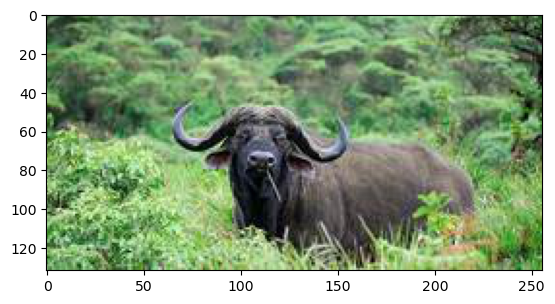

In [4]:
import matplotlib.pyplot as plt

input, label = eagerDataset[0]
print(input.shape)
img = input.numpy()
img -= np.min(img)
img /= (np.max(img) - np.min(img))

plt.imshow(img)

In [5]:
import torch
import torch.nn as nn

# Suppose we have 3 classes
num_classes = 3

# Example batch of target labels
# Each element represents the class index
# [0, 2, 1, 0] means the first sample belongs to class 0, second sample to class 2, and so on
target = torch.tensor([0, 2, 1, 0])

# Instantiate CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Calculate loss
# Note that the input to criterion is the model's output (logits) and the target labels
# We assume logits is a tensor of shape (batch_size, num_classes)
# For illustration, let's assume logits for this example
logits = torch.randn(4, num_classes)  # Random logits for illustration
loss = criterion(logits, target)

print(loss)


tensor(1.5647)
